In [3]:
import pandas as pd

csv_path = r"C:\!учеба\lr1\heart2022.csv"
df = pd.read_csv(csv_path)

print(f"Общий размер датасета: {df.shape[0]} строк, {df.shape[1]} колонок")

Общий размер датасета: 445132 строк, 40 колонок


In [4]:
df.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [32]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [5]:
#дубли, пропуски
df_cleaned = df.drop_duplicates()
df_final = df_cleaned.dropna().copy()

print(f"После удаления пропусков и дублей: {df_final.shape}")

После удаления пропусков и дублей: (246013, 40)


In [6]:
# Считаем количество каждого класса
class_counts = df_final['HadDiabetes'].value_counts()
class_percentages = df_final['HadDiabetes'].value_counts(normalize=True) * 100

print(f"Общее количество строк: {len(df_final):,}")
print("\nПроцентное соотношение классов:")

print(f"Класс 0 (нет диабета): {class_percentages.iloc[0]:.2f}%")
print(f"Класс 1 (диабет): {class_percentages.iloc[1]:.2f}%")

Общее количество строк: 246,013

Процентное соотношение классов:
Класс 0 (нет диабета): 83.26%
Класс 1 (диабет): 13.74%


In [7]:
#удаляем колонки нерелеватные
columns_to_keep = [
    'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
    'PhysicalActivities', 'SleepHours', 'HadAngina', 'HadStroke', 'HadAsthma',
    'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
    'HadArthritis', 'HadDiabetes', 'DifficultyWalking', 'DifficultyErrands',
    'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
    'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HighRiskLastYear',
    'HadHeartAttack'
]

# Проверяем, какие колонки из списка существуют в датасете
existing_columns = [col for col in columns_to_keep if col in df.columns]
missing_columns = [col for col in columns_to_keep if col not in df.columns]

if missing_columns:
    print(f"Предупреждение: следующие колонки отсутствуют в датасете: {missing_columns}")
    print("Будут сохранены только существующие колонки из списка.")

# Оставляем только нужные колонки
df_filtered = df_final[existing_columns]
df_filtered.to_csv('heart_disease_not_balanced_j.csv', index=False)

print(f"Исходный датасет: {df_final.shape[0]} строк, {df_final.shape[1]} колонок")
print(f"Фильтрованный датасет: {df_filtered.shape[0]} строк, {df_filtered.shape[1]} колонок")
print(f"Сохраненные колонки: {list(df_filtered.columns)}")

Исходный датасет: 246013 строк, 40 колонок
Фильтрованный датасет: 246013 строк, 26 колонок
Сохраненные колонки: ['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 'SleepHours', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DifficultyWalking', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HighRiskLastYear', 'HadHeartAttack']


In [8]:
numerical_cols = df_filtered.select_dtypes(include=['float64']).columns.tolist()
categorical_cols = df_filtered.select_dtypes(include=['object']).columns.tolist()

print("Числовые колонки:", numerical_cols)
print("Категориальные колонки:", categorical_cols)

Числовые колонки: ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'WeightInKilograms', 'BMI']
Категориальные колонки: ['Sex', 'GeneralHealth', 'PhysicalActivities', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DifficultyWalking', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HighRiskLastYear', 'HadHeartAttack']


In [9]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

%matplotlib inline

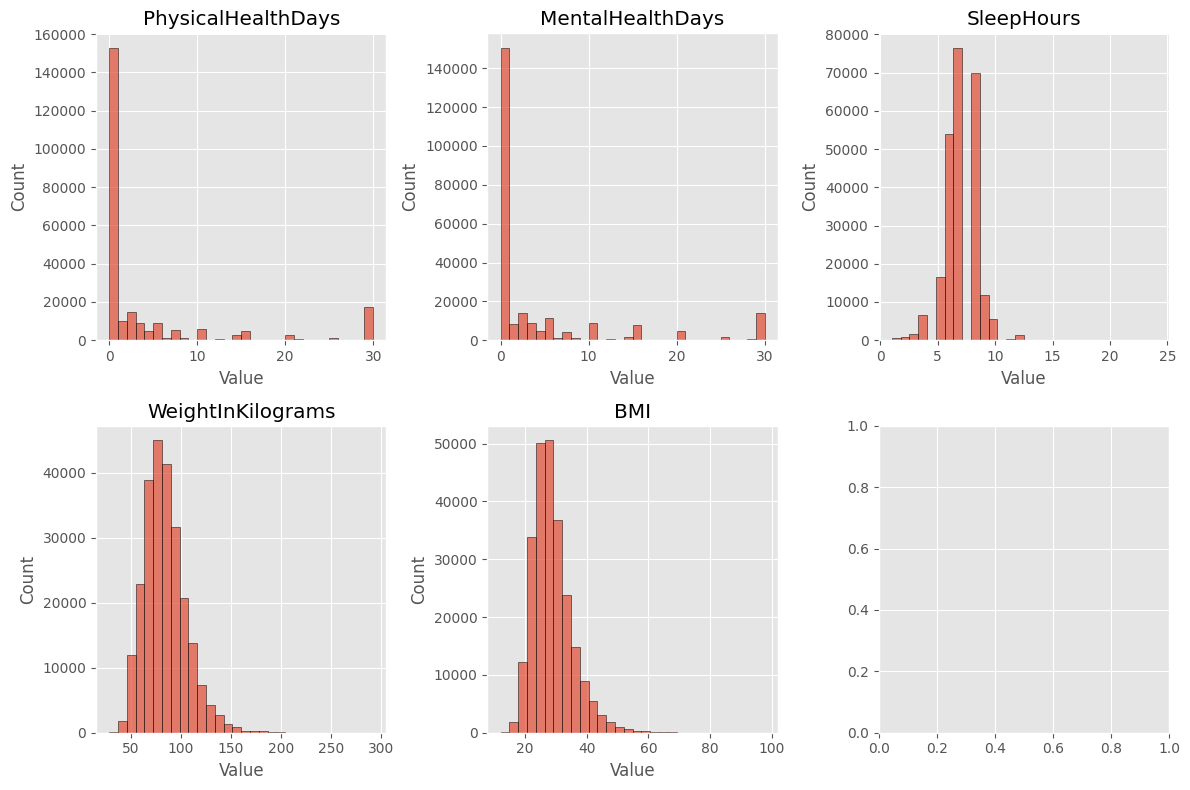

In [10]:
#смотрим распределение у числовых братьев
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(numerical_cols):
    row = i // 3
    col_num = i % 3
    ax = axes[row, col_num]
    
    ax.hist(df_filtered[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

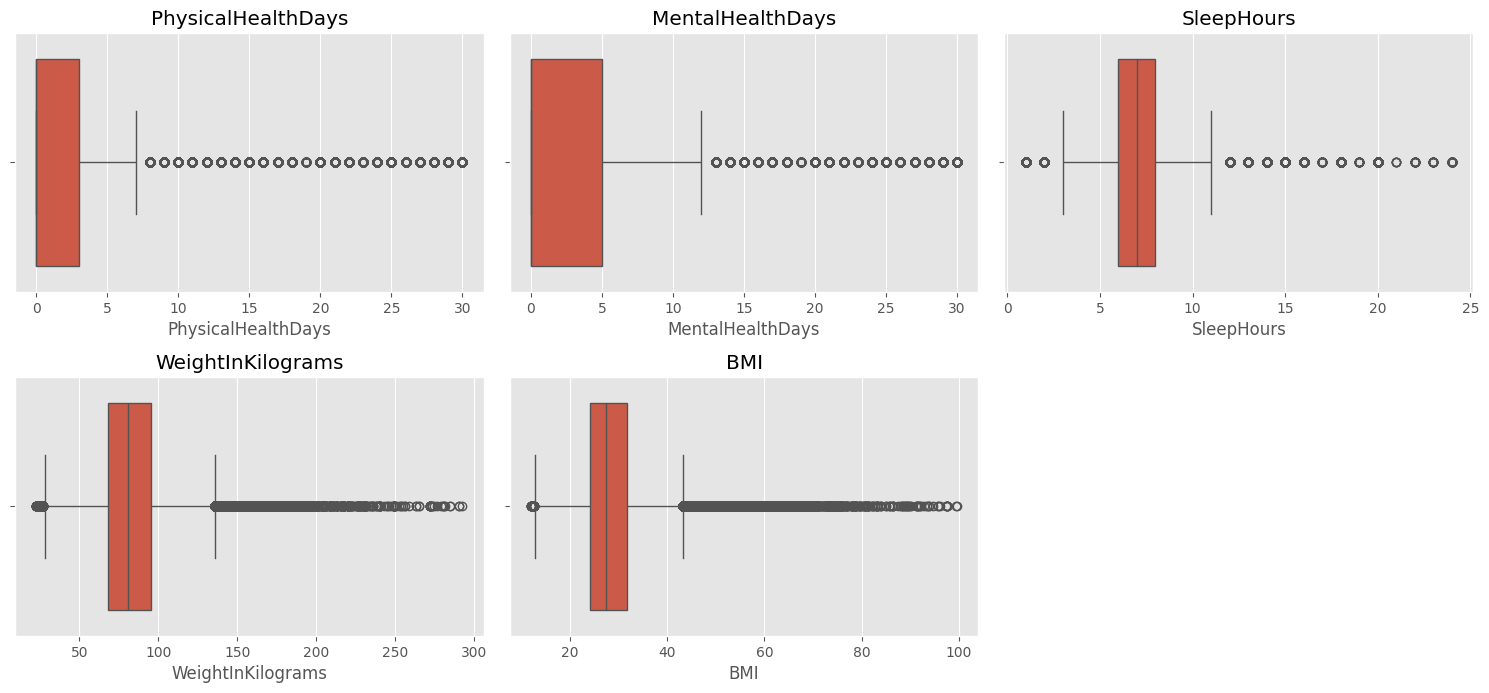

In [ ]:
import seaborn as sns

#ящики с усами для анализа выбросов
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

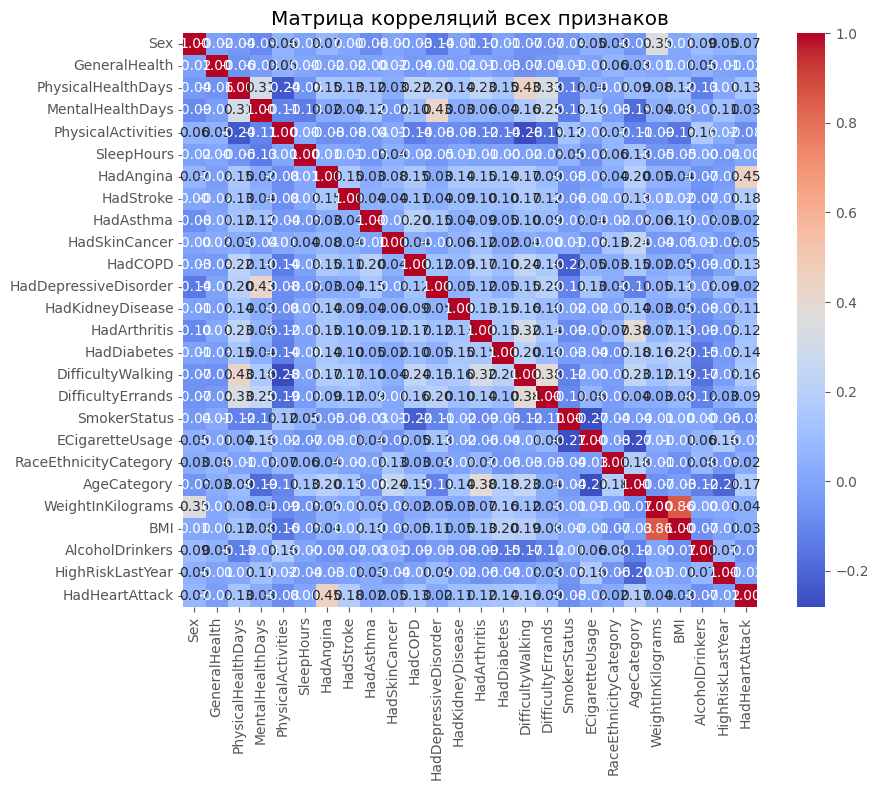

In [ ]:
import matplotlib.pyplot as plt

#Матрица корреляций
plt.figure(figsize=(10, 8))
corr_matrix = df_processed.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляций всех признаков')
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder

df_processed = df_filtered.copy()

# Кодирование категориальных признаков
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

standard_cols = ['SleepHours', 'WeightInKilograms', 'BMI']
if all(col in df_processed.columns for col in standard_cols):
    scaler_standard = StandardScaler()
    # Используем .loc для безопасного присвоения
    df_processed.loc[:, standard_cols] = scaler_standard.fit_transform(df_processed[standard_cols])

robust_cols = ['PhysicalHealthDays', 'MentalHealthDays']
if all(col in df_processed.columns for col in robust_cols):
    scaler_robust = RobustScaler()
    df_processed.loc[:, robust_cols] = scaler_robust.fit_transform(df_processed[robust_cols])


In [12]:
df_processed.head(5)

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadAngina,HadStroke,HadAsthma,HadSkinCancer,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,WeightInKilograms,BMI,AlcoholDrinkers,HighRiskLastYear,HadHeartAttack
342,0,4,1.333333,0.00,1,1.373426,0,0,0,0,...,0,2,0,4,9,-0.560213,-0.104123,0,0,0
343,1,4,0.000000,0.00,1,-0.708902,0,0,0,0,...,0,2,0,4,10,0.545626,0.224400,0,0,0
345,1,4,0.000000,0.00,0,0.679317,0,0,0,0,...,0,2,0,4,11,1.183898,0.459279,1,0,0
346,0,1,1.666667,0.00,1,1.373426,0,0,0,1,...,0,3,0,4,12,0.333181,0.407084,0,0,0
347,0,2,1.000000,3.75,1,-1.403011,0,0,0,0,...,0,3,0,4,12,-0.198635,0.675736,0,0,0


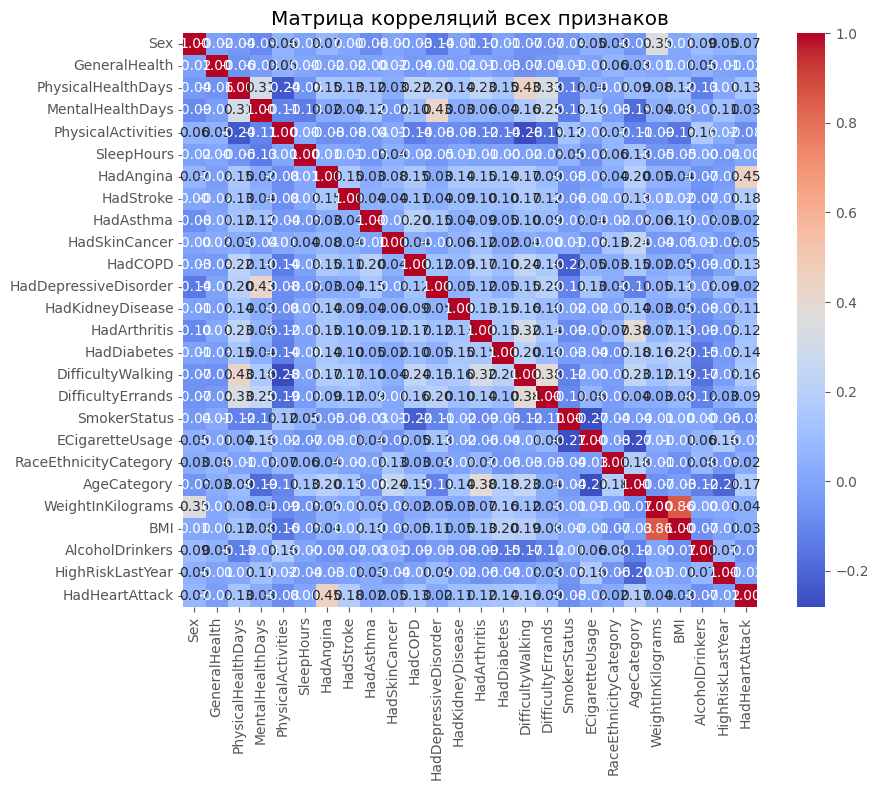

In [ ]:
import matplotlib.pyplot as plt

#Матрица корреляций
plt.figure(figsize=(10, 8))
corr_matrix = df_processed.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляций всех признаков')
plt.tight_layout()
plt.show()

In [ ]:
#удаляем строки до 100к путем удаления по мажоритарному классу
def reduce_to_100k(df, target_col='HadHeartAttack'):

    # Считаем распределение классов
    class_counts = df[target_col].value_counts()
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()
    
    minority_count = class_counts[minority_class]
    
    # Сколько нужно оставить от мажоритарного класса
    majority_needed = 100000 - minority_count
    
    if majority_needed <= 0:
        print("Миноритарный класс уже больше 100000 записей")
        return df
    
    # Разделяем данные
    df_minority = df[df[target_col] == minority_class]
    df_majority = df[df[target_col] == majority_class]
    
    # Выбираем нужное количество из мажоритарного класса
    df_majority_sampled = df_majority.sample(n=majority_needed, random_state=42)
    
    # Объединяем
    df_balanced = pd.concat([df_majority_sampled, df_minority])
    
    # Перемешиваем
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return df_balanced

# Применение
df_bal = reduce_to_100k(df_processed, 'HadHeartAttack')
print(f"Размер после балансировки: {df_bal.shape}")
print(f"Распределение: {df_bal['HadHeartAttack'].value_counts()}")


Размер после балансировки: (100000, 26)
Распределение: HadHeartAttack
0    86565
1    13435
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Определение целевого признака
X = df_bal.drop('HadHeartAttack', axis=1)
y = df_bal['HadHeartAttack']

# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Обучающая выборка: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Тестовая выборка: X_test={X_test.shape}, y_test={y_test.shape}")

Обучающая выборка: X_train=(80000, 25), y_train=(80000,)
Тестовая выборка: X_test=(20000, 25), y_test=(20000,)


In [ ]:
#балансировка обучающей выборки по целевому признаку HadHeartAttack
from imblearn.over_sampling import SMOTE

smote = SMOTE(
    sampling_strategy='auto',  # увеличение меньшего класса до размера большинственного.
    random_state=42,        
    k_neighbors=5,                         
)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f'Размер обучающей выборки после балансировки: X={X_resampled.shape}, y={y_resampled.shape}')

Размер обучающей выборки после балансировки: X=(138504, 25), y=(138504,)


Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Точность модели (Accuracy): 0.7701

Отчет по классам:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86     17313
           1       0.31      0.59      0.41      2687

    accuracy                           0.77     20000
   macro avg       0.62      0.69      0.63     20000
weighted avg       0.84      0.77      0.80     20000



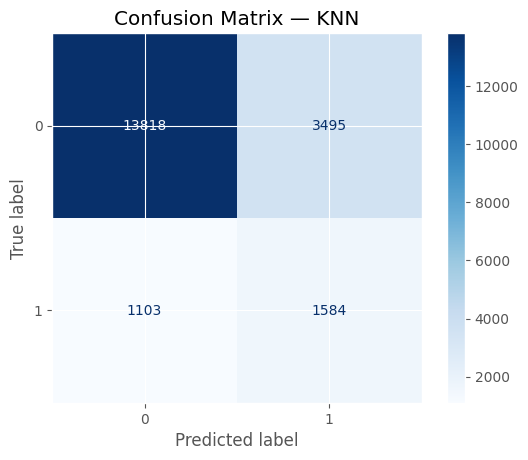

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

param_grid = {
    'n_neighbors': [3, 7, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
print("Лучшие параметры:", grid_search.best_params_)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

print("\nТочность модели (Accuracy):", accuracy_score(y_test, y_pred))
print("\nОтчет по классам:\n", classification_report(y_test, y_pred))

#Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation='horizontal')
plt.title("Confusion Matrix — KNN")
plt.show()

Лучшие параметры: {'max_depth': 10, 'n_estimators': 200}

Точность модели (Accuracy): 0.9039

Отчет по классам:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     17313
           1       0.71      0.48      0.58      2687

    accuracy                           0.90     20000
   macro avg       0.82      0.73      0.76     20000
weighted avg       0.89      0.90      0.90     20000



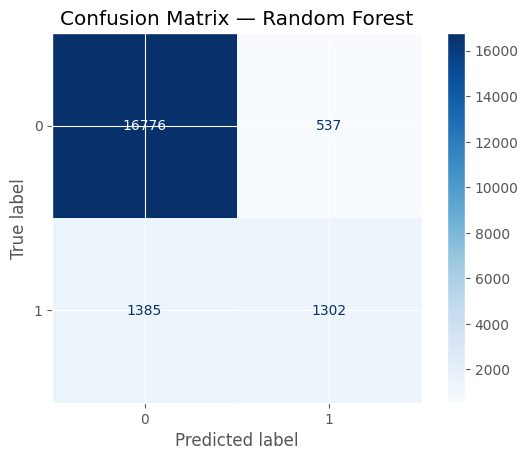

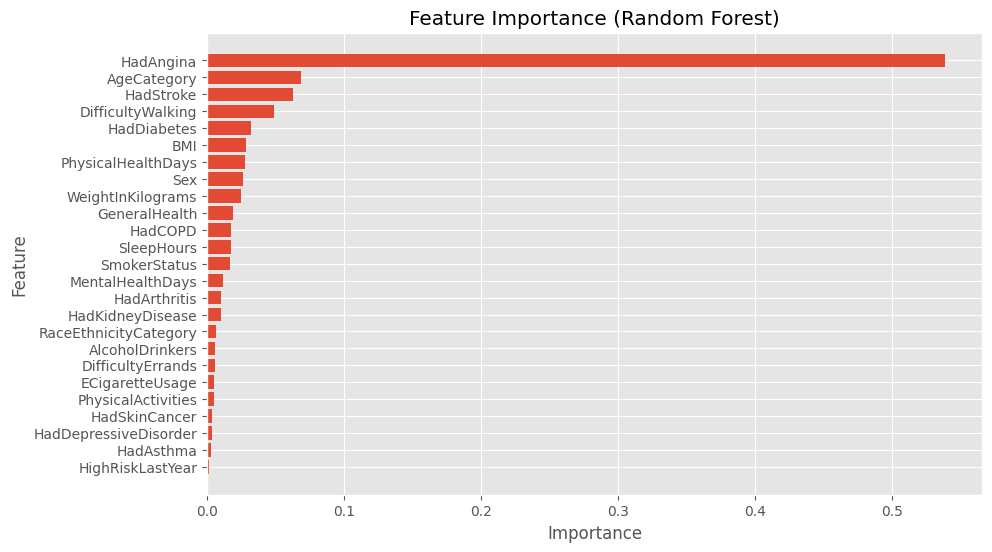

In [33]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nТочность модели (Accuracy):", accuracy_score(y_test, y_pred))
print("\nОтчет по классам:\n", classification_report(y_test, y_pred))

#Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation='horizontal')
plt.title("Confusion Matrix — Random Forest")
plt.show()

# значимость признаков график
importances = best_rf.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()